# Linear Regression
Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out

In [1]:
#Start off by importing libraies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Get the data
We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

Avg. Session Length: Average session of in-store style advice sessions.

Time on App: Average time spent on App in minutes

Time on Website: Average time spent on Website in minutes

Length of Membership: How many years the customer has been a member.

In [5]:
# set the dataset equal to the variable
df = pd.read_csv('Ecommerce Customers')

In [6]:
#head() shows the first 5 column and rows
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
#info() shows the different information regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [8]:
#Shows the descriptive statistics from the dataset
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Exploratory Data Analysis

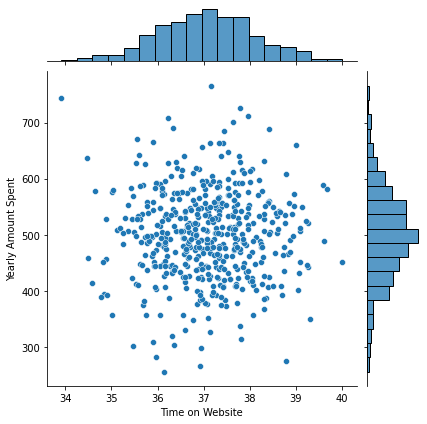

In [9]:
#Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns
g = sns.JointGrid(x = 'Time on Website', y ='Yearly Amount Spent', data=df )
g.plot(sns.scatterplot, sns.histplot)

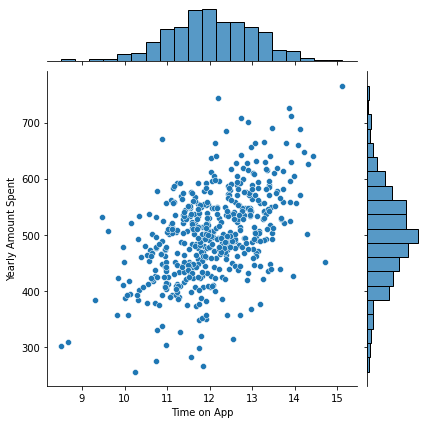

In [10]:
#these two axes have a positive corelation with each other
d = sns.JointGrid(x = 'Time on App', y ='Yearly Amount Spent', data=df )
d.plot(sns.scatterplot, sns.histplot)

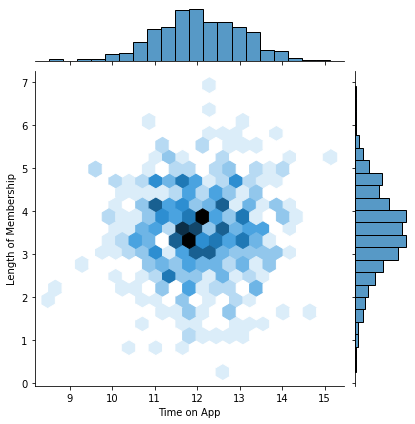

In [11]:
c = sns.jointplot(x = 'Time on App', y ='Length of Membership',kind='hex', data=df )
c

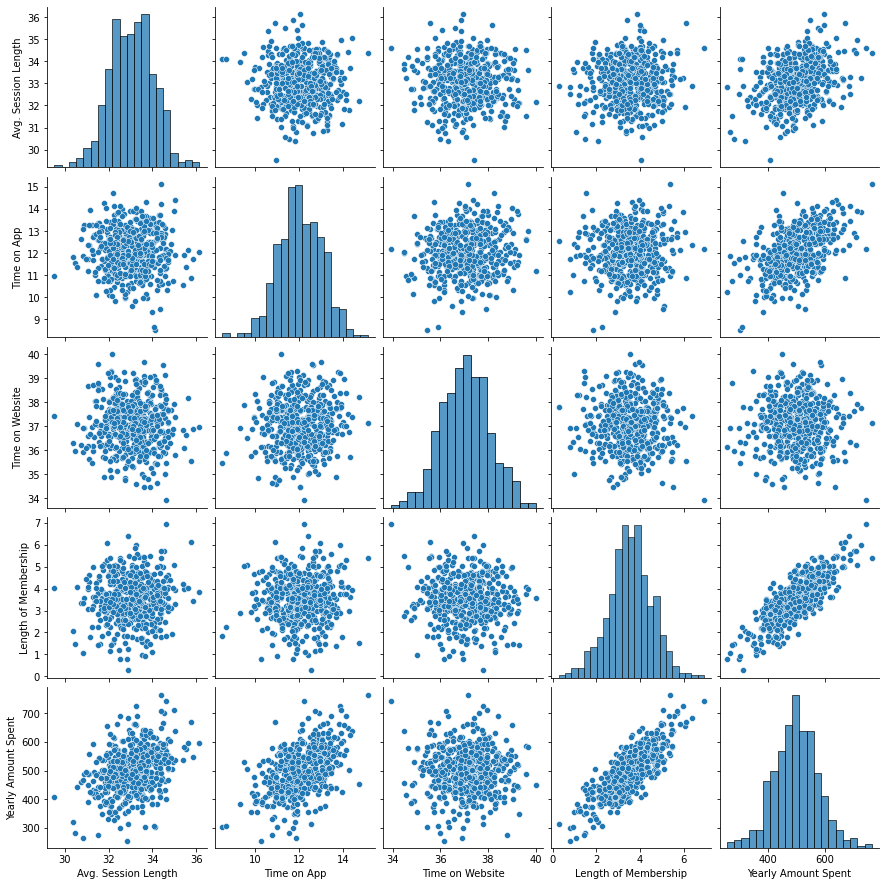

In [12]:
#Shows relationship across the whole dataset
#Their is a correlation between Yearly Amount Spent and Length of Membership 
sns.pairplot(df)

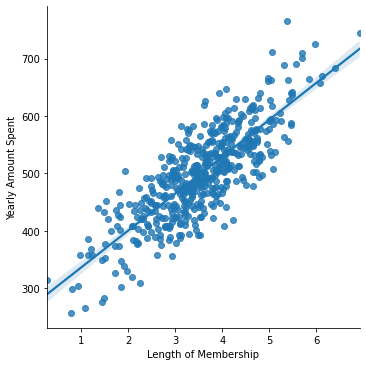

In [13]:
#Used a lmplot to create a linear model of the two.
sns.lmplot(x = 'Length of Membership', y = 'Yearly Amount Spent', data=df) 

# Training a Linear Regression Model
Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable.

In [17]:
#The train-test split is a technique for evaluating the performance of a machine learning algorithm.
#This technique is used for measuring how accurate the nmodel is.
#Start by dividing the model into two sets. One is for testing and one is for training.
#We are trying to predict the outcome of y
X=df[[ 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

# Train Test Split
Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Training the Model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
#Created a instance of a linear regression named lm
lm = LinearRegression()

In [22]:
# This is going to fit the linear regression model.
#A fit describes the data between two model without being biased
lm.fit(X_train,y_train)

LinearRegression()

# Model Evaluation
Let's evaluate the model by checking out it's coefficients and how we can interpret them

In [23]:
#Checks the coefficient of the model
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [41]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


# Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values

In [25]:
predictions = lm.predict(X_test)

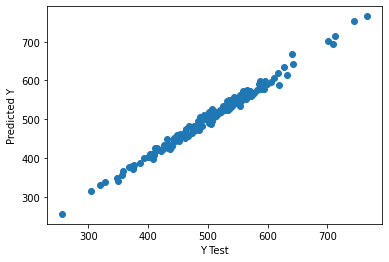

In [26]:
#This shows that we have a good model of the test data
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.scatter(y_test,predictions)

# Evaluating the Model
Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2)

In [28]:
from sklearn import metrics

In [45]:
#If we had a error the data on the graph would be more spread out.
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430847
MSE: 79.81305165097461
RMSE: 8.933815066978642


In [29]:
#This means the model explains 98 of the variance so a very good model
metrics.explained_variance_score(y_test, predictions)

0.9890771231889607

# Residuals
You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

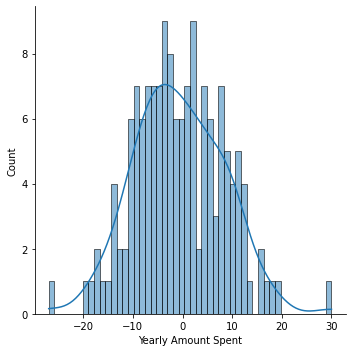

In [50]:
sns.displot((y_test-predictions),bins=50,kde=True)

# Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important. Let's see if we can interpret the coefficients at all to get an idea.

In [51]:
coeff_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


How can you interpret the coefficient?

Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.

Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.

Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.

Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.


Do you think the company should focus more on their mobile app or on their website?

Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better.Explore the similarities between Length of Membership and the App or the Website more before coming to a conclusion.